In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [74]:
curr_dir=os.getcwd()
f_path = os.path.join(curr_dir, "data", "cancer patient data sets.csv")
df=pd.read_csv(f_path)
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [75]:
df=df.drop("index", axis=1)
features = df.drop(["Patient Id","Level"], axis=1)
labels = df["Level"]

In [78]:
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [83]:
df_low_others = df.copy()
df_low_others["Level"] = df['Level'].replace(["Medium","High"],"medium_high")
#df_low_others["Level"] = df_low_others['Level'].replace("High","medium_high")
pd.unique(df_low_others['Level'])


array(['Low', 'medium_high'], dtype=object)

In [86]:
f_pca=['Age',
 'Alcohol use',
 'Smoking',
 'chronic Lung Disease',
 'Fatigue',
 'Coughing of Blood',
 'Chest Pain',
 'Genetic Risk',
 'OccuPational Hazards',
 'Shortness of Breath',
 'Weight Loss',
 'Clubbing of Finger Nails',
 'Dry Cough',
 'Wheezing']

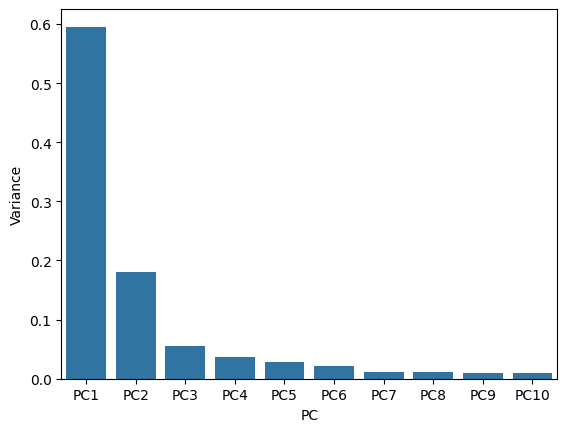

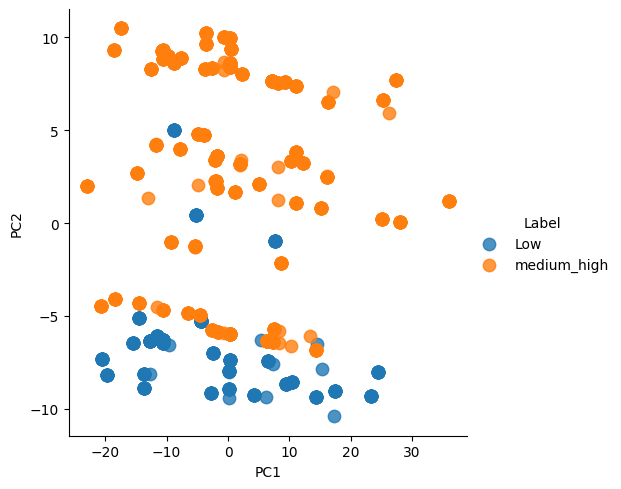

In [97]:
x=df_low_others.drop(["Patient Id","Level"], axis=1)
#x=x[f_pca]
y=df_low_others["Level"]
n_comp=10
pc_list = [f"PC{i+1}" for i in range(n_comp)]

from sklearn import decomposition
pca = decomposition.PCA(n_components=n_comp)
pc = pca.fit_transform(x)
pc_df = pd.DataFrame(data=pc,columns=pc_list)
pc_df['Label'] = y
# variance explained by PCs
# PC1 + PC2 explains 78% variance 
var = pd.DataFrame({'Variance':pca.explained_variance_ratio_,
             'PC':pc_list})

sns.barplot(x='PC',y="Variance", 
           data=var)
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Label', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size

In [98]:
import plotly.express as plotly_express
figure = plotly_express.scatter_3d(pc_df,x="PC1",y="PC2",z="PC3",color="Label",)
figure.update_layout(showlegend=True)
figure.show()

#### Random trying stuff

In [12]:
f_select_k = ['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards',
                    'Genetic Risk', 'Balanced Diet', 'Obesity', 'Passive Smoker',
                    'Chest Pain', 'Coughing of Blood']
f_pca = ['Age','Alcohol use','Smoking','chronic Lung Disease','Fatigue',
            'Coughing of Blood','Chest Pain','Genetic Risk','OccuPational Hazards']

In [28]:
f_pca=['Age',
 'Alcohol use',
 'Smoking',
 'chronic Lung Disease',
 'Fatigue',
 'Coughing of Blood',
 'Chest Pain',
 'Genetic Risk',
 'OccuPational Hazards',
 'Shortness of Breath',
 'Weight Loss',
 'Clubbing of Finger Nails',
 'Dry Cough',
 'Wheezing']

In [29]:
selected_features = df[f_pca]
selected_features.shape

(1000, 14)

In [30]:
from sklearn.model_selection import train_test_split
X = selected_features
# Can replace this with our features when we have
y = df["Level"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn import svm
from sklearn.metrics import accuracy_score
# linear_clf = svm.SVC(probability=True)
linear_clf = svm.SVC(kernel="linear", decision_function_shape='ovo', probability=True)
linear_clf.fit(X_train, y_train)
y_pred = linear_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  1.0


In [32]:
#Cross validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(linear_clf, X, y, cv=5)
print("Mean CV accuracy:", cv_scores.mean())

Mean CV accuracy: 0.999


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


scaler = StandardScaler()
X = features
# X= scaler.fit_transform(X)

X[['Age']] = scaler.fit_transform(X[['Age']])
# X_test_scaled = scaler.transform(X_test)
# Can replace this with our features when we have
y = df["Level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


logistic_clf = LogisticRegression(random_state=42)
logistic_clf.fit(X_train, y_train)
# Predicting on the test set
y_pred = logistic_clf.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  1.0


/Users/huiyitay/Downloads/CS3244/Group_project/Lung_Cancer_Prediction/ML_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
logistic_clf.intercept_
logistic_clf.coef_


array([[ 0.03434047, -0.80784678,  0.67452085,  1.6040984 , -1.75332497,
         0.01836964, -0.90355648, -0.08877461,  0.55775422,  0.63769478,
        -0.73501528,  1.08333276, -0.08835636,  0.38159429,  1.18386213,
        -0.31783914,  0.27342937, -0.20823523,  0.58953571,  0.39954   ,
        -0.13661256, -0.17665006, -0.51928112],
       [-0.52512186,  0.69237727,  0.26247467, -0.95178943,  0.12922002,
         0.8326003 , -0.96600179, -0.2403569 , -0.04336386, -0.61796264,
         0.8837116 , -1.07735983,  0.61892977, -0.33287696, -1.31264152,
         0.69470783, -0.23088894, -0.1309877 , -0.72342495, -0.82814757,
        -0.09951956, -0.01080901, -0.03241843],
       [ 0.4907814 ,  0.11546951, -0.93699552, -0.65230897,  1.62410495,
        -0.85096994,  1.86955827,  0.32913151, -0.51439036, -0.01973215,
        -0.14869633, -0.00597293, -0.53057341, -0.04871733,  0.12877939,
        -0.37686869, -0.04254043,  0.33922293,  0.13388924,  0.42860757,
         0.23613212,  0.1874